# Unsupervised Learning : Mini-project 2

TEAM Details:

<b>Group ID</b> - 13 <br>

<b>Group Members</b>:<br>
2020AIML030 - Karunya DS <br>
2020AIML069 - Samtani Edwin<br>
2020AIML022 - Apoorva ventra<br>

Medicine Dataset. The dataset is a CSV file with each row containing a tweet.

Tasks: 

#### Data Preprocessing  [4 points]
1. Read the text data from the csv file
2. Convert the variable into corresponding feature vectors as below. Perform pre-processing step of stopword removal , special character removal , converting the text to the lower case , remove Url’s if any  from text.  [1 pt]
3. For each title text, convert it into corresponding TF-IDF vector. [1 pt]
4. TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA. [2 pt]

#### Perform K-means clustering for different values of K (2,3,4) and evaluate the quality of clustering using Silhouette score. [4 points]
1. For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [2 pt]
2. Draw a bar graph with X-axis as K value and Y-axis as silhouette score. [1 pt]
3. Explain (1-2 lines) which is the best clustering and why. [1 pt]

#### Consider the pre-processed text of all the sentences and find words that frequently occur together. [4 points]
1. More specifically, find association rules of minimum length 2 with 20% confidence and 10% support. Other parameters you are free to decide on your own. How many such rules are there? List all the rules. Interpret any one rule. [2 pt]
2. Draw a line graph with Y-axis as number of association rules of minimum length 2, and X-axis as confidence percentage (ranging from 0%, 10%, 20%, ...., 100%). Plot different colored lines for different support percentage (take values as 10%, 20%, and 50%) [2 pt]

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from array import array
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kanta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kanta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#!pip install nltk

## Load Dataset

In [3]:
data_df = pd.read_csv('problem_statement_4.csv', encoding = 'unicode_escape')

## Get dimensionality of the data

In [4]:
print("Number of Records : {} \nNumber of columns : {}".format(data_df.shape[0], data_df.shape[1]))

Number of Records : 9470 
Number of columns : 1


## Overview of data

In [5]:
data_df.head(10)

,headline
0,$MMM fell on hard times but could be set to re...
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...
3,$MMM #insideday follow up as it also opened up...
4,$MMM is best #dividend #stock out there and do...
5,$MMM - 3M: The Fallen Dividend King Will Be Ba...
6,$MMMcelebrates New Year with 7 month high clos...
7,$MMM above 180 baby is going higher
8,"$MMMhasn't really done much this year, but it ..."
9,3M $MMM Rating Increased to Neutral at JPMorga...


#### Removing stop words

In [6]:

stop = stopwords.words('english')

In [7]:
data_df['headline_without_stopwords'] = data_df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_df.head(3)


,headline,headline_without_stopwords
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...


#### Removing special characters 

In [8]:
data_df['headline_without_spl_char'] = data_df['headline_without_stopwords'].map(lambda x: re.sub(r'\W+', ' ', x))
data_df['headline_without_spl_char'] = data_df['headline_without_spl_char'].apply(lambda x : x.replace("_", " "))
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Á Peer PerformÁ
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Á Peer PerformÁ Wolfe Research...


#### Converting the text to the lower case

In [9]:
data_df['headline_lower'] = data_df['headline_without_spl_char'].apply(lambda x : x.lower())
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char,headline_lower
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon,mmm fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Á Peer PerformÁ,wolfe research upgrades 3m mmm á peer performá
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Á Peer PerformÁ Wolfe Research...,3m mmm upgraded á peer performá wolfe research...


#### Removing URLS if any

In [10]:
data_df['headline_without_url'] = data_df['headline_lower'].apply(lambda x : re.sub(r'http\S+','', x))
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char,headline_lower,headline_without_url
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon,mmm fell hard times could set rebound soon,mmm fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Á Peer PerformÁ,wolfe research upgrades 3m mmm á peer performá,wolfe research upgrades 3m mmm á peer performá
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Á Peer PerformÁ Wolfe Research...,3m mmm upgraded á peer performá wolfe research...,3m mmm upgraded á peer performá wolfe research...


In [11]:
##Taking only required column in a new dataframe object

clean_df = pd.DataFrame()
clean_df['headline'] = data_df['headline_without_url']

#### Creating TF-IDF Vector

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer() #Can add some more parameters of accuracy is not as required 

In [13]:
x = v.fit_transform(clean_df['headline'])

In [14]:
vector_df = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
vector_df

,00,000,0014,0015,0017,0028,003,0063,0074,008,...,zs,zts,zuora,zyxi,ák,ákák,ákákák,ákákákák,áv,áx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Signifies that there are 10,097 terms that are unique in the dataset

#### Reducing 10,097 dimensions to 2 using PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x.toarray())
principalComponents

array([[-0.03222692, -0.0449713 ],
       [-0.02629273, -0.0393548 ],
       [-0.00969324, -0.01071897],
       ...,
       [-0.01394367, -0.015916  ],
       [-0.01494315, -0.04280984],
       [-0.01523838, -0.04278809]])

In [16]:
pca_df = pd.DataFrame(principalComponents)
pca_df

,0,1
0,-0.032227,-0.044971
1,-0.026293,-0.039355
2,-0.009693,-0.010719
3,-0.037148,-0.054310
4,-0.056071,-0.005742
...,...,...
9465,-0.016110,-0.051180
9466,0.011730,0.035244
9467,-0.013944,-0.015916
9468,-0.014943,-0.042810


### K-means clustering for different values

In [17]:
def perform_kmeans(k,df):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=15,random_state=1,max_iter=200,verbose=0)
    kmeans.fit(df)
    label = kmeans.fit_predict(df)
    centers = np.array(kmeans.cluster_centers_)
    LABEL_COLOR_MAP = {0:'r', 1:'g', 2:'b', 3:'y'}
    label_color = [LABEL_COLOR_MAP[l] for l in label]
    plt.scatter(pca_df[0], pca_df[1], c=label_color)
    for i in range(0,k):
            plt.scatter(centers[i][0],centers[i][1], marker="o", color='k', s=200)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, kmeans.labels_))

#### K-Means with k = 2

Silhouette Coefficient: 0.697


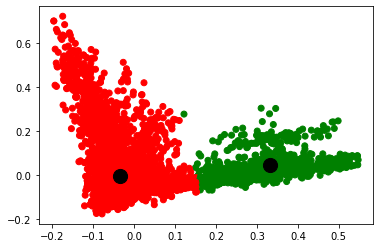

In [18]:
perform_kmeans(2,pca_df)

#### K-Means with k = 3

Silhouette Coefficient: 0.728


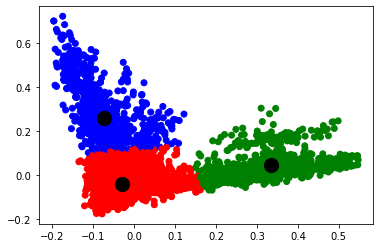

In [19]:
perform_kmeans(3,pca_df)

#### K-Means with k = 4

Silhouette Coefficient: 0.660


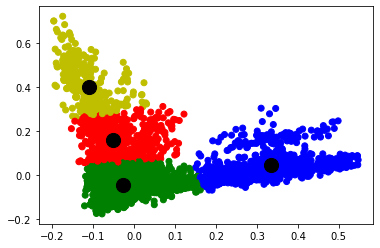

In [20]:
perform_kmeans(4,pca_df)

### Silhouette score plot with different k values

In [21]:
silhouette_coefficients = []
for k in range(2,5):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=15,random_state=1,max_iter=200,verbose=0)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.6966836931775607, 0.7276023914659777, 0.660069941591127]

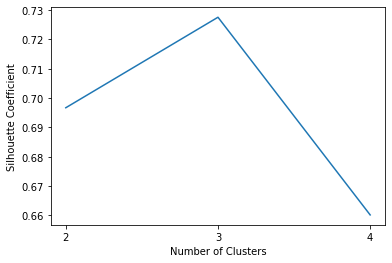

In [23]:
plt.plot(range(2, 5), silhouette_coefficients)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Conclusion : The cluster with K=3 is best in this case the silhouette score is high when compared to other K<br/> //More description to be added

### Association rule Mining - Apriori algorithm [incomplete**]

In [24]:
clean_df

,headline
0,mmm fell hard times could set rebound soon
1,wolfe research upgrades 3m mmm á peer performá
2,3m mmm upgraded á peer performá wolfe research...
3,mmm insideday follow also opened nice candle ...
4,mmm best dividend stock 40 2019 xli go go please
...,...
9465,wmt walmart shifts remodeling vs new stores
9466,walmart inc wmt holder texas permanent school ...
9467,wmt gild 3 dividend stocks perfect retirees
9468,walmart expanding use robots scan shelves sort...


In [25]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

clean_df['tokenized_sents'] = clean_df['headline'].apply(lambda x: nltk.word_tokenize(x))


te = TransactionEncoder()
te_ary = te.fit(clean_df['tokenized_sents']).transform(clean_df['tokenized_sents'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df


#clean_df[["tokenized_sents"]].to_numpy()

,0,00,000,0014,0015,0017,0028,003,0063,0074,...,zts,zuora,zyxi,á,ák,ákák,ákákák,ákákákák,áv,áx
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets.drop(frequent_itemsets[frequent_itemsets['length'] < 2].index, inplace = True)
frequent_itemsets


,support,itemsets,length
0,0.052482,(0),1
1,0.099578,(00),1
2,0.021331,(000),1
3,0.067476,(1),1
4,0.020063,(10),1
...,...,...,...
579,0.010348,"(earnings, by, results, 0, eps)",5
580,0.011193,"(co, pg, gamble, procter, sells)",5
581,0.012355,"(selling, co, insider, stock, sells)",5
582,0.010560,"(earnings, raises, estimates, previously, eps)",5


In [60]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["confidence"] = rules["confidence"] *100
rules["support"] = rules["support"] *100
rules[ (rules['antecedent_len'] >= 2) ]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
164,"(price, stocks)",(00),0.021331,0.099578,2.059134,96.534653,9.694413,0.018467,25.983617,2
165,"(price, 00)",(stocks),0.056917,0.158184,2.059134,36.178108,2.287094,0.011588,1.319009,2
166,"(stocks, 00)",(price),0.033474,0.080042,2.059134,61.514196,7.685217,0.017912,2.390382,2
170,"(price, 00)",(target),0.056917,0.072122,5.659979,99.443414,13.788128,0.052495,166.708659,2
171,"(price, target)",(00),0.064097,0.099578,5.659979,88.303130,8.867769,0.050217,7.697977,2
...,...,...,...,...,...,...,...,...,...,...
403,"(insider, selling)","(sells, stock)",0.026927,0.062408,2.059134,76.470588,12.253409,0.018911,3.984768,2
404,"(insider, stock)","(sells, selling)",0.024287,0.020591,2.059134,84.782609,41.173913,0.020091,6.436114,2
405,"(sells, selling)","(insider, stock)",0.020591,0.024287,2.059134,100.000000,41.173913,0.020091,inf,2
406,"(sells, stock)","(insider, selling)",0.062408,0.026927,2.059134,32.994924,12.253409,0.018911,1.452238,2


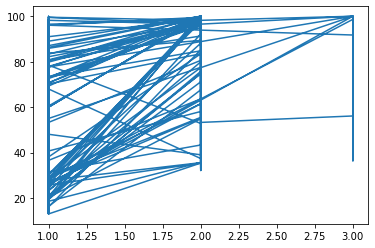

In [61]:
   plt.plot(rules["antecedent_len"],rules["confidence"])